## **Synergy Logistics**
#### Análisis de Datos

#### _por Jessica Martínez Escobedo_


##### Introducción a la Ciencia de Datos | _**EMTECH**_ 


_Contexto_

La Dirección de Synergy Logistics ha solicitado al equipo operativo, realizar unapropuesta que permita enfocar las prioridades de la estrategia operativa 2021; para ello, se plantea analizar la viabilidad de 3 opciones de enfoque: rutas de importación y exportación, medio de transporte utilizado y valor total de importaciones y exportaciones.

***Identificar los puntos en que debe enfocarse la estrategia de la empresa.*** 

In [99]:
# Llamar a las Bibliotecas a utilizar.
import pandas as pd 
import matplotlib.pyplot as plt

In [100]:
#Base de Datos
df = pd.read_csv('synergy_logistics_database.csv')

In [101]:
#Crear DataFrame 
df["date"] = pd.to_datetime(df["date"])
df['mes'] = df['date'].dt.strftime('%m')
df['anio'] = df['date'].dt.strftime('%Y')
df.head()

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value,mes,anio
0,1,Exports,Japan,China,2015,2015-01-31,Cars,Sea,Honda,33000000,01,2015
1,2,Exports,Japan,China,2015,2015-01-02,Cars,Sea,Honda,16000000,01,2015
2,3,Exports,Japan,China,2015,2015-02-02,Cars,Sea,Honda,29000000,02,2015
3,4,Exports,Japan,China,2015,2015-03-02,Cars,Sea,Honda,14000000,03,2015
4,5,Exports,Japan,China,2015,2015-04-02,Cars,Sea,Honda,17000000,04,2015


In [102]:
df. dtypes

register_id                int64
direction                 object
origin                    object
destination               object
year                       int64
date              datetime64[ns]
product                   object
transport_mode            object
company_name              object
total_value                int64
mes                       object
anio                      object
dtype: object

+ ### Rutas de Importación y Exportación a partir de los flujos de de las mismas. 

In [103]:
def obtienedf(datos): 
  dff = df[df['direction'] == datos]
  dff = dff.groupby(by=['origin','destination'], as_index=False).count()
  dff = dff.filter(['origin','destination','register_id'])
  dff = dff.set_axis(['origen','destino','total'], axis=1)
  dff = dff.sort_values(by='total', ascending=False).head(10)
  dff["Origen_Destino"] = dff["origen"]+"-"+dff["destino"]
  dff = dff.filter(['Origen_Destino','total'])
  return dff 

In [104]:

def graficabarras(datos, t):
  df1.plot(kind = 'bar')
  plt.xlabel("Origen - Destino")
  plt.title("Rutas de "+ t )
  plt.ylabel("Viajes")
  plt.xticks(range(10), df1["Origen_Destino"]);

In [105]:
#
df1 = obtienedf('Exports')
df1 

,Origen_Destino,total
118,South Korea-Vietnam,497
95,Netherlands-Belgium,437
135,USA-Netherlands,436
32,China-Mexico,330
75,Japan-Brazil,306
51,Germany-France,299
115,South Korea-Japan,279
3,Australia-Singapore,273
24,Canada-Mexico,261
35,China-Spain,250


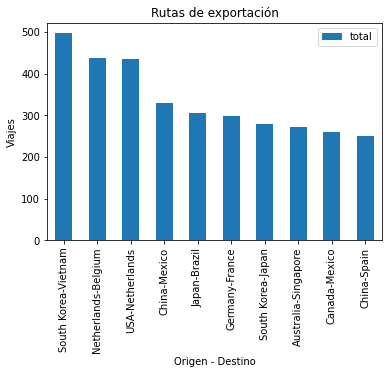

In [106]:
graficabarras(df1,"exportación")

In [107]:
df1 = obtienedf('Imports')
df1

,Origen_Destino,total
33,Singapore-Thailand,273
12,Germany-China,233
4,China-Japan,210
20,Japan-Mexico,206
7,China-Thailand,200
26,Malaysia-Thailand,195
38,Spain-Germany,142
31,Mexico-USA,122
9,China-United Arab Emirates,114
1,Brazil-China,113


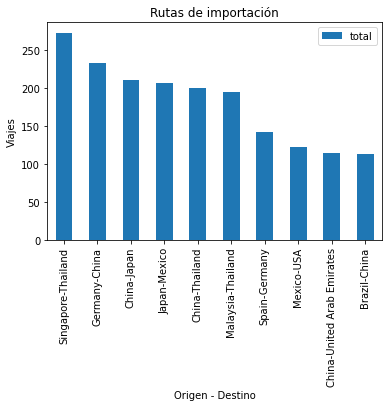

In [108]:
graficabarras(df1, "importación")

+ ### Medio de transporte utilizado

In [109]:
# Definir variable 
def medio_transporte(tipo):
  mt = df[df['direction'] == tipo]
  mt = mt.groupby(by=['transport_mode'], as_index=False).count()
  mt = mt.filter(['transport_mode','register_id'])
  mt = mt.set_axis(['transport_mode','total'], axis=1)
  mt = mt.sort_values(by='total', ascending=False).head(10)
  return mt

In [110]:
me = medio_transporte('Exports')
me.head()

,transport_mode,total
3,Sea,8434
1,Rail,2780
2,Road,2149
0,Air,2045


In [111]:
# Medio de importación más usado
mi = medio_transporte('Imports')
mi.head()

,transport_mode,total
3,Sea,2254
1,Rail,601
2,Road,449
0,Air,344


+ ### Valor total de Importaciones y Exportaciones

In [112]:
def imp_exp(dir,pais):
  ie = df[df['direction'] == dir]
  ie = ie.groupby(by=[pais], as_index=False).count()
  ie = ie.filter([pais,'register_id'])
  ie = ie.set_axis([pais,'total'], axis=1)
  ie = ie.sort_values(by='total', ascending=False)#.head(10)
  suma = ie['total'].sum()
  ie['acumulado'] = ie['total'].cumsum(axis = 0)
  ie['porcentaje'] = (ie['acumulado']/suma)*100
  ie = ie[ie['porcentaje'] < 80]
  return ie

In [113]:
exportaciones = imp_exp('Exports','destination')
exportaciones

,destination,total,acumulado,porcentaje
15,Mexico,1404,1404,9.112150
29,USA,1345,2749,17.841381
2,Belgium,1248,3997,25.941070
6,China,1008,5005,32.483126
4,Brazil,903,5908,38.343718
8,France,893,6801,44.139408
9,Germany,824,7625,49.487279
16,Netherlands,699,8324,54.023884
13,Japan,658,8982,58.294393
25,Spain,632,9614,62.396158


In [114]:
importaciones = imp_exp('Imports','origin')
importaciones

,origin,total,acumulado,porcentaje
3,China,615,615,16.858553
7,Japan,445,1060,29.057018
14,USA,376,1436,39.364035
5,Germany,369,1805,49.479167
9,Mexico,366,2171,59.512061
11,Singapore,273,2444,66.995614
8,Malaysia,199,2643,72.450658
13,Spain,183,2826,77.467105


La base de la estrategia, de acuerdo con los datos, debería estar enfocada en atender a las exportaciones  que se realizan por el medio de transporte Sea, en las rutas South Korea-Vietnam, Netherlands-Belgium, USA-Netherlands, China-Mexico, Japan-Brazil, Germany- France, South Korea- Japan, Australia-Singapour, Canada-Mexico y China-Spain.

Respecto a las Importaciones, que también tienen como principal medio de transporte Sea, en las rutas Singapore-Thailand, Germany-China, China-Japan, Japan-Mexico, China-Thailand, Malasya-Thailand, Spain-Germany, Mexico-USA, China-United Arab Emirates y Brazil-China. 